In [7]:
from scipy.fft import fft, fftfreq
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.colors as colors
from scipy.ndimage import binary_fill_holes

# image_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/Sample1.jpg'
image_path = "C:/Users/blake/Downloads/Sampletestpic.jpg"
# image_path = 'C:/Users/blake/Documents/VSCode/Python/Greven/2023_4_6.jpg'

def get_rgbs(image_object,pixel_tuple):
    return image_object.getpixel(pixel_tuple)

def get_rgb_lists(image_path):
    with Image.open(image_path) as im:
        full_rgbs =  np.array(im)
    ylen = len(full_rgbs)
    xlen = len(full_rgbs[0])
    r = np.zeros([ylen,xlen])
    g = np.zeros([ylen,xlen])
    b = np.zeros([ylen,xlen])
    for y in range(ylen):
        for x in range(xlen):
            r[y][x] = full_rgbs[y][x][0]
            g[y][x] = full_rgbs[y][x][1]
            b[y][x] = full_rgbs[y][x][2]
    return r,g,b

def get_gray(image_path):
        return np.array(Image.open(image_path).convert('L'))

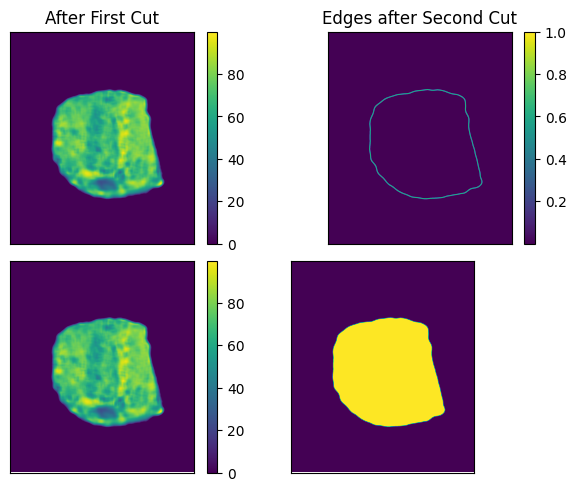

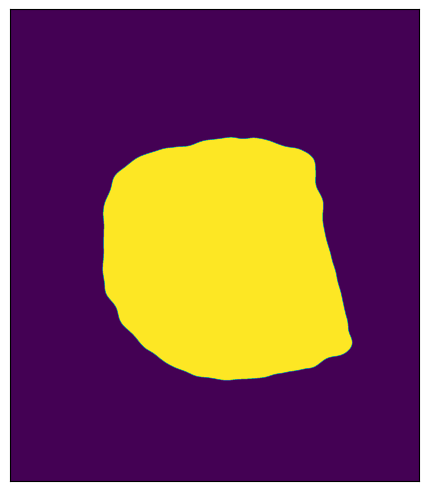

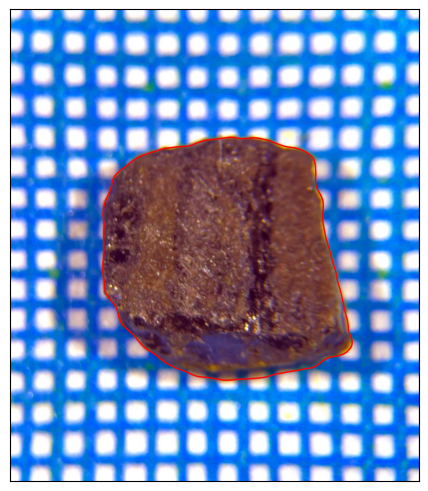

In [8]:
rs,gs,bs = get_rgb_lists(image_path)
img = cv2.imread(image_path)
#all the cutoffs have a range of 1 to 255. Good starting range is between 125 and 175 for both
cutoff1 = 120 #lower values will include more, but have more shadows
cutoff2 = 150 # 
kernal_size = 45 #must be odd, bigger will be less precise, but get rid of random noise, dots, etc
line_size = 5 #this must be an odd integer. It is the thickness of the edge lines

intial_blur = cv2.blur(bs,(kernal_size,kernal_size)) #this takes the average of kernal_size by kernal_size region centered at each point
# intial_blur = cv2.GaussianBlur(curtained, (kernal_size, kernal_size),cv2.BORDER_DEFAULT)

made_cut = np.zeros([len(bs),len(bs[0])])
first_cut = intial_blur.max()-intial_blur #this makes the dark spots highest amplitude
for i in range(len(bs)):
    for j in range(len(bs[0])):
        if first_cut[i][j] < cutoff1:
              first_cut[i][j] = 0
        else:
            first_cut[i][j] -= cutoff1
            made_cut[i][j] = 255
# np.where(second_cut > cutoff2,0,1)
second_cut = cv2.blur(made_cut, (kernal_size, kernal_size))
for i in range(len(bs)):
    for j in range(len(bs[0])):
        if second_cut[i][j] > cutoff2:
            second_cut[i][j] = 1
        else:
            second_cut[i][j] = 0
# second_cut = np.where(second_blur > cutoff2,0,1)

edge_finder = cv2.blur(abs(cv2.Laplacian(second_cut,cv2.CV_64F)),(line_size,line_size))
cutoff3 = edge_finder.max()/8
for i in range(len(bs)):
    for j in range(len(bs[0])):
        if edge_finder[i][j] >cutoff3:
            edge_finder[i][j]=1
        else:
            edge_finder[i][j]=0
# edge_finder = np.where(edge_finder > cutoff3,1,0)
overlayed = img.copy()
for i in range(len(bs)):
    for j in range(len(bs[0])):
        if edge_finder[i][j]:
            overlayed[i][j] = (0, 0, 255)#red


fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(2, 2, 1)
bx = fig.add_subplot(2, 2, 2)
cx = fig.add_subplot(2, 2, 3)
dx = fig.add_subplot(2, 2, 4)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
bx.get_xaxis().set_visible(False)
bx.get_yaxis().set_visible(False)
cx.get_xaxis().set_visible(False)
cx.get_yaxis().set_visible(False)
dx.get_xaxis().set_visible(False)
dx.get_yaxis().set_visible(False)
p1 = ax.imshow(first_cut)
ax.set_title('After First Cut')
fig.colorbar(p1, ax=ax)
p4 = bx.imshow(edge_finder,vmin=1e-6)
bx.set_title('Edges after Second Cut')
fig.colorbar(p4, ax=bx)
p2 = cx.imshow(first_cut)
fig.colorbar(p2, ax=cx)
p3 = dx.imshow(second_cut)

fig2 = plt.figure(constrained_layout = True)
ex = fig2.add_subplot(1, 1, 1)
ex.get_xaxis().set_visible(False)
ex.get_yaxis().set_visible(False)
p5 = ex.imshow(second_cut)

fig3 = plt.figure(constrained_layout = True)
fx = fig3.add_subplot(1, 1, 1)
fx.get_xaxis().set_visible(False)
fx.get_yaxis().set_visible(False)
p6 = fx.imshow(cv2.cvtColor(overlayed, cv2.COLOR_BGR2RGB))

# cv2.imwrite('output.jpg', overlayed)

# print(np.array_equiv(binary_fill_holes(second_cut), second_cut))

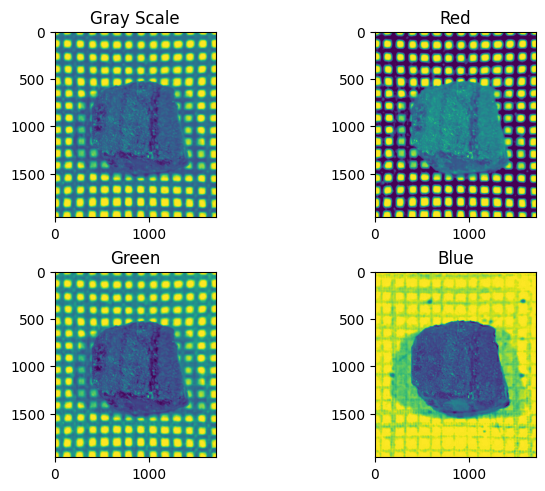

In [9]:

# print(get_gray(image_path))
rs,gs,bs = get_rgb_lists(image_path)
fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(2, 2, 1)
bx = fig.add_subplot(2, 2, 2)
cx = fig.add_subplot(2, 2, 3)
dx = fig.add_subplot(2, 2, 4)
ax.imshow(get_gray(image_path))
ax.set_title('Gray Scale')
bx.imshow(rs)
bx.set_title('Red')
cx.imshow(gs)
cx.set_title('Green')
dx.imshow(bs)
dx.set_title('Blue')
plt.show()


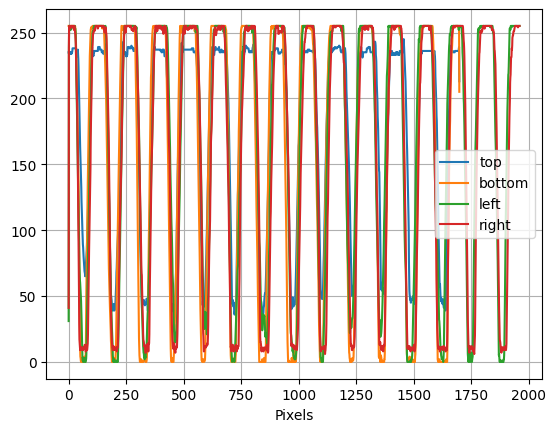

[0.007647058823529411, 0.007647058823529411, 0.007645259938837921, 0.007645259938837921]
There are (0.0038230796905918333+-4.497211728725272e-07) mm per pixel
The image is 6.499235474006117mm long, and 7.5008823529411774mm tall


In [10]:
from scipy.fft import fft, fftfreq

with Image.open(image_path) as im:
    full_rgbs =  np.array(im)
ylen = len(full_rgbs)
xlen = len(full_rgbs[0])
r = np.zeros([ylen,xlen])
g = np.zeros([ylen,xlen])
b = np.zeros([ylen,xlen])
for y in range(ylen):
    for x in range(xlen):
        r[y][x] = full_rgbs[y][x][0]
        g[y][x] = full_rgbs[y][x][1]
        b[y][x] = full_rgbs[y][x][2]


boxes = .5 # known mm /box

# not_blue = (r+b)/2 #Now i am using cyan
lefts = np.transpose(r)[0]
rights = np.transpose(r)[-2]
tops = r[1]
bottoms = r[-1]

top_amplitudes = fft(tops)
bottom_amplitudes = fft(bottoms)
left_amplitudes = fft(lefts)
right_amplitudes = fft(rights)

x_freqs = fftfreq(xlen, 1)[:xlen//2]# get the frequencies that coorespond to the amplitudes calculated in the previous line
y_freqs = fftfreq(ylen, 1)[:xlen//2]# get the frequencies that coorespond to the amplitudes calculated in the previous line
top_line_spacing = x_freqs[np.argmax(np.absolute(top_amplitudes)[1:xlen//2])+1]# this is the boxes per pixel
bottom_line_spacing = x_freqs[np.argmax(np.absolute(bottom_amplitudes)[1:xlen//2])+1]
left_line_spacing = y_freqs[np.argmax(np.absolute(left_amplitudes)[1:xlen//2])+1]
right_line_spacing = y_freqs[np.argmax(np.absolute(right_amplitudes)[1:xlen//2])+1]

dxs =[top_line_spacing,bottom_line_spacing,right_line_spacing,left_line_spacing] # this are the boxes per pixel

dx = boxes * np.average(dxs) # the conversion makes dx in units of mm / pixel
x_err = boxes * np.std(dxs)
sub = -600
# plt.plot(x_freqs[1:-800], 2.0/xlen * np.abs(top_amplitudes[1:xlen//2-800]))
plt.plot(tops)
plt.plot(bottoms)
plt.plot(lefts)
plt.plot(rights)
# plt.plot(tops)
# plt.plot(bottoms[:-10])
# plt.plot(lefts)
# plt.plot(rights[:-10])
plt.legend(['top','bottom','left','right'])
# plt.plot(75*np.sin(2*np.pi*dx*np.arange(xlen))+80)
plt.xlabel('Pixels')
plt.grid()
plt.show()
print(dxs)
print(r'There are ({}+-{}) mm per pixel'.format(dx,x_err))
print('The image is {}mm long, and {}mm tall'.format(xlen*dx,ylen*dx))